In [1]:
# import table
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import itertools as it
import json
%matplotlib inline

from pm4py.objects.log.importer.xes import importer
from pm4py.algo.discovery.inductive.variants.im_f import algorithm as im_f_algo
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator

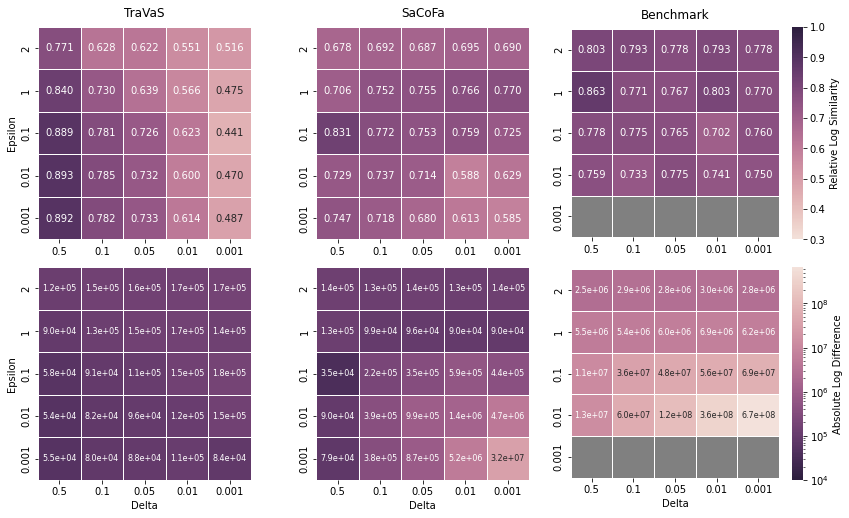

In [5]:
# load final data
util_single = np.loadtxt('TraVaS-sqvr/util_sqvr.txt')
util_sacofa = np.loadtxt('sacofa/util_sacofa.txt')
util_bench = np.loadtxt('benchmark/util_bench.txt')

cost_single = np.loadtxt('TraVaS-sqvr/cost_sqvr.txt')
cost_sacofa = np.loadtxt('sacofa/cost_sacofa.txt')
cost_bench = np.loadtxt('benchmark/cost_bench.txt')

util_best = util_single
util_bench = np.vstack([util_bench, [np.nan, np.nan, np.nan, np.nan, np.nan]])
cost_best = cost_single
cost_bench = np.vstack([cost_bench, [np.nan, np.nan, np.nan, np.nan, np.nan]])

# create plots
f, ax = plt.subplots(2, 3, figsize=(12.2, 7.3))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
cmap_r = sns.cubehelix_palette(as_cmap=True, light=.9, reverse=True)
cmap.set_bad('grey', 1.)
cmap_r.set_bad('grey', 1.)
ax[0,0] = sns.heatmap(util_best, ax=ax[0,0], vmin=0.3, vmax=1, cmap=cmap, square=True, annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5)
ax[0,1] = sns.heatmap(util_sacofa, ax=ax[0,1], vmin=0.3, vmax=1, cmap=cmap, square=True, annot=True, fmt='.3f', cbar=False, yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5)
ax[0,2] = sns.heatmap(util_bench, ax=ax[0,2], vmin=0.3, vmax=1, cmap=cmap, square=True, annot=True, fmt='.3f', cbar=True, yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], mask=np.isnan(util_bench), linewidths=.5, cbar_kws={'label': 'Relative Log Similarity'})
ax[1,0] = sns.heatmap(cost_best, ax=ax[1,0], cmap=cmap_r, square=True, norm=LogNorm(vmin=1e4, vmax=np.nanmax(cost_bench)), annot=True, cbar=False, fmt='.1e', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5, annot_kws={"fontsize":8})
ax[1,1] = sns.heatmap(cost_sacofa, ax=ax[1,1], cmap=cmap_r, square=True, norm=LogNorm(vmin=1e4, vmax=np.nanmax(cost_bench)), annot=True, cbar=False, fmt='.1e', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5, annot_kws={"fontsize":8})
ax[1,2] = sns.heatmap(cost_bench, ax=ax[1,2], cmap=cmap_r, norm=LogNorm(vmin=1e4, vmax=np.nanmax(cost_bench)), square=True, annot=True, fmt='.1e', cbar=True, yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5, cbar_kws={'label': 'Absolute Log Difference'}, annot_kws={"fontsize":8})
ax[0,0].set_title('TraVaS', pad=10)
ax[0,1].set_title('SaCoFa', pad=10)
ax[0,2].set_title('Benchmark', pad=10)
ax[1,0].set(xlabel="Delta", ylabel="Epsilon")
ax[0,0].set(ylabel="Epsilon")
ax[1,1].set(xlabel="Delta")
ax[1,2].set(xlabel="Delta")
f.tight_layout()
plt.savefig("Sepsis_1_sqvr.pdf")

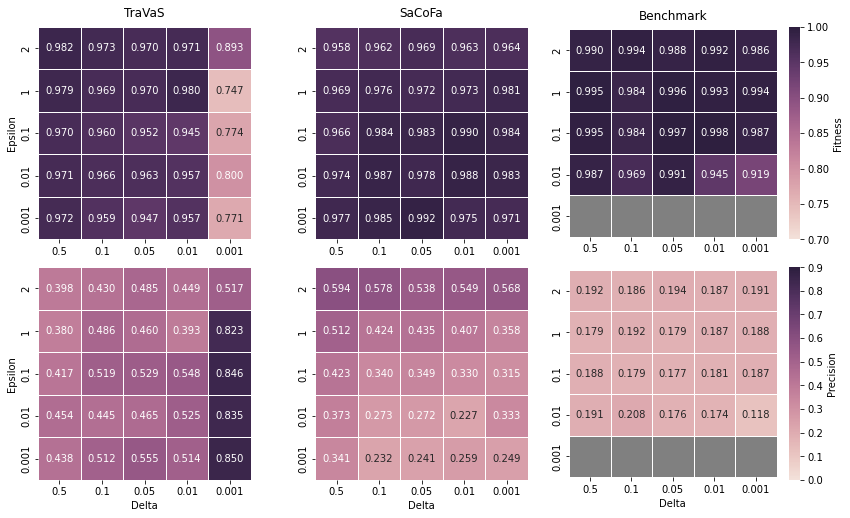

In [6]:
# load final data
prec_single = np.loadtxt('TraVaS-sqvr/prec_sqvr.txt')
prec_sacofa = np.loadtxt('sacofa/prec_sacofa.txt')
prec_bench = np.loadtxt('benchmark/prec_bench.txt')
prec_bench = np.vstack([prec_bench, [np.nan, np.nan, np.nan, np.nan, np.nan]])
prec_best = prec_single

fit_single = np.loadtxt('TraVaS-sqvr/fit_sqvr.txt')
fit_sacofa = np.loadtxt('sacofa/fit_sacofa.txt')
fit_bench = np.loadtxt('benchmark/fit_bench.txt')
fit_bench = np.vstack([fit_bench, [np.nan, np.nan, np.nan, np.nan, np.nan]])
fit_best = fit_single

gen_single = np.loadtxt('TraVaS-sqvr/gen_sqvr.txt')
gen_sacofa = np.loadtxt('sacofa/gen_sacofa.txt')
gen_bench = np.loadtxt('benchmark/gen_bench.txt')
gen_bench = np.vstack([gen_bench, [np.nan, np.nan, np.nan, np.nan, np.nan]])
gen_best = gen_single

# create plots
f, ax = plt.subplots(2, 3, figsize=(12.2, 7.3))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
cmap.set_bad('grey', 1.)
ax[0,0] = sns.heatmap(fit_best, ax=ax[0,0], vmin=0.7, vmax=1, cmap=cmap, square=True, annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5)
ax[0,1] = sns.heatmap(fit_sacofa, ax=ax[0,1], vmin=0.7, vmax=1, cmap=cmap, square=True, annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5)
ax[0,2] = sns.heatmap(fit_bench, ax=ax[0,2], vmin=0.7, vmax=1, cmap=cmap, square=True, annot=True, fmt='.3f', cbar=True, yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], mask=np.isnan(fit_bench), linewidths=.5, cbar_kws={'label': 'Fitness'})
ax[1,0] = sns.heatmap(prec_best, ax=ax[1,0], cmap=cmap, square=True, vmin=0, vmax=0.9, annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5)
ax[1,1] = sns.heatmap(prec_sacofa, ax=ax[1,1], cmap=cmap, square=True, vmin=0, vmax=0.9, annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5)
ax[1,2] = sns.heatmap(prec_bench, ax=ax[1,2], cmap=cmap, vmin=0, vmax=0.9, square=True, annot=True, fmt='.3f', cbar=True, yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5, cbar_kws={'label': 'Precision'})
ax[0,0].set_title('TraVaS', pad=10)
ax[0,1].set_title('SaCoFa', pad=10)
ax[0,2].set_title('Benchmark', pad=10)
ax[1,0].set(xlabel="Delta", ylabel="Epsilon")
ax[0,0].set(ylabel="Epsilon")
ax[1,1].set(xlabel="Delta")
ax[1,2].set(xlabel="Delta")
f.tight_layout()
plt.savefig("Sepsis_2_sqvr.pdf")

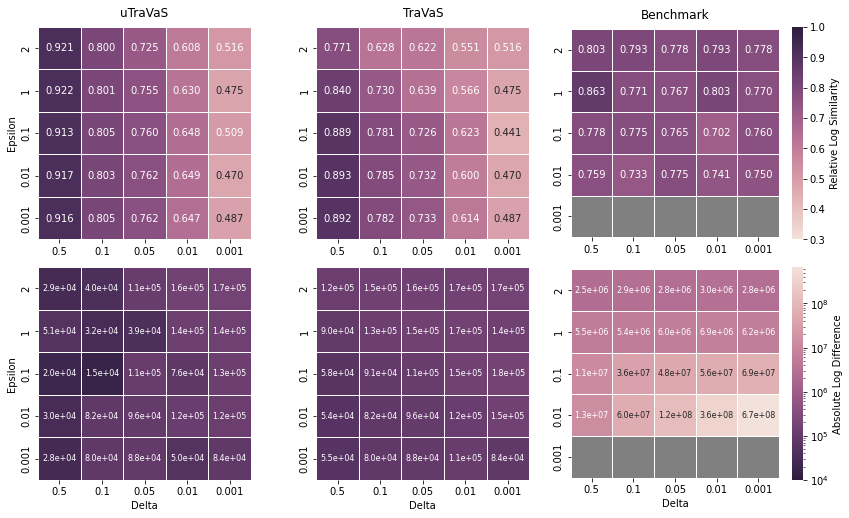

In [8]:
# load final data
util_single = np.loadtxt('TraVaS-sqvr/util_sqvr.txt')
util_multi = np.loadtxt('TraVaS-optimizer/util_opt.txt')
util_sacofa = np.loadtxt('sacofa/util_sacofa.txt')
util_bench = np.loadtxt('benchmark/util_bench.txt')

cost_single = np.loadtxt('TraVaS-sqvr/cost_sqvr.txt')
cost_multi = np.loadtxt('TraVaS-optimizer/cost_opt.txt')
cost_sacofa = np.loadtxt('sacofa/cost_sacofa.txt')
cost_bench = np.loadtxt('benchmark/cost_bench.txt')

util_best = np.maximum(util_single, util_multi)
util_bench = np.vstack([util_bench, [np.nan, np.nan, np.nan, np.nan, np.nan]])
cost_best = np.minimum(cost_single, cost_multi)
cost_bench = np.vstack([cost_bench, [np.nan, np.nan, np.nan, np.nan, np.nan]])

# create plots
f, ax = plt.subplots(2, 3, figsize=(12.2, 7.3))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
cmap_r = sns.cubehelix_palette(as_cmap=True, light=.9, reverse=True)
cmap.set_bad('grey', 1.)
cmap_r.set_bad('grey', 1.)
ax[0,0] = sns.heatmap(util_best, ax=ax[0,0], vmin=0.3, vmax=1, cmap=cmap, square=True, annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5)
ax[0,1] = sns.heatmap(util_single, ax=ax[0,1], vmin=0.3, vmax=1, cmap=cmap, square=True, annot=True, fmt='.3f', cbar=False, yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5)
ax[0,2] = sns.heatmap(util_bench, ax=ax[0,2], vmin=0.3, vmax=1, cmap=cmap, square=True, annot=True, fmt='.3f', cbar=True, yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], mask=np.isnan(util_bench), linewidths=.5, cbar_kws={'label': 'Relative Log Similarity'})
ax[1,0] = sns.heatmap(cost_best, ax=ax[1,0], cmap=cmap_r, square=True, norm=LogNorm(vmin=1e4, vmax=np.nanmax(cost_bench)), annot=True, cbar=False, fmt='.1e', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5, annot_kws={"fontsize":8})
ax[1,1] = sns.heatmap(cost_single, ax=ax[1,1], cmap=cmap_r, square=True, norm=LogNorm(vmin=1e4, vmax=np.nanmax(cost_bench)), annot=True, cbar=False, fmt='.1e', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5, annot_kws={"fontsize":8})
ax[1,2] = sns.heatmap(cost_bench, ax=ax[1,2], cmap=cmap_r, norm=LogNorm(vmin=1e4, vmax=np.nanmax(cost_bench)), square=True, annot=True, fmt='.1e', cbar=True, yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5, cbar_kws={'label': 'Absolute Log Difference'}, annot_kws={"fontsize":8})
ax[0,0].set_title('uTraVaS', pad=10)
ax[0,1].set_title('TraVaS', pad=10)
ax[0,2].set_title('Benchmark', pad=10)
ax[1,0].set(xlabel="Delta", ylabel="Epsilon")
ax[0,0].set(ylabel="Epsilon")
ax[1,1].set(xlabel="Delta")
ax[1,2].set(xlabel="Delta")
f.tight_layout()
plt.savefig("Sepsis_1_sup.pdf")

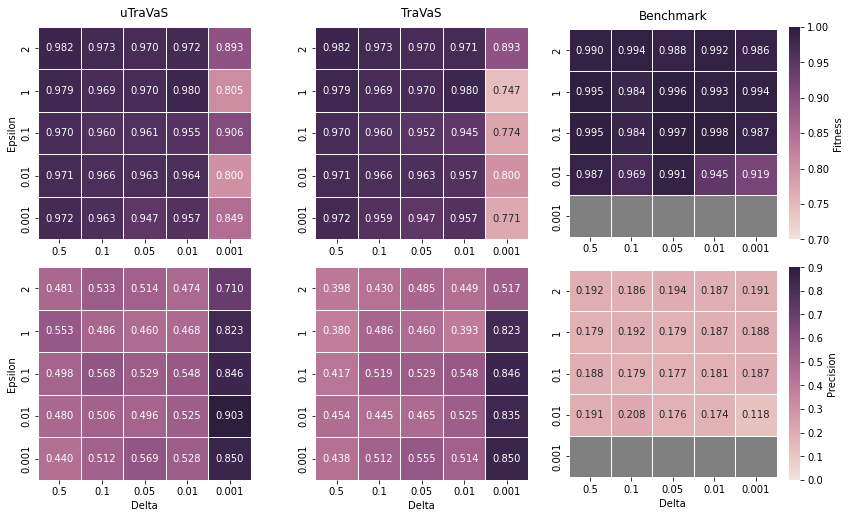

In [10]:
# load final data
prec_single = np.loadtxt('TraVaS-sqvr/prec_sqvr.txt')
prec_multi = np.loadtxt('TraVaS-optimizer/prec_opt.txt')
prec_sacofa = np.loadtxt('sacofa/prec_sacofa.txt')
prec_bench = np.loadtxt('benchmark/prec_bench.txt')
prec_bench = np.vstack([prec_bench, [np.nan, np.nan, np.nan, np.nan, np.nan]])
prec_best = np.maximum(prec_single, prec_multi)

fit_single = np.loadtxt('TraVaS-sqvr/fit_sqvr.txt')
fit_multi = np.loadtxt('TraVaS-optimizer/fit_opt.txt')
fit_sacofa = np.loadtxt('sacofa/fit_sacofa.txt')
fit_bench = np.loadtxt('benchmark/fit_bench.txt')
fit_bench = np.vstack([fit_bench, [np.nan, np.nan, np.nan, np.nan, np.nan]])
fit_best = np.maximum(fit_single, fit_multi)

gen_single = np.loadtxt('TraVaS-sqvr/gen_sqvr.txt')
gen_multi = np.loadtxt('TraVaS-optimizer/gen_opt.txt')
gen_sacofa = np.loadtxt('sacofa/gen_sacofa.txt')
gen_bench = np.loadtxt('benchmark/gen_bench.txt')
gen_bench = np.vstack([gen_bench, [np.nan, np.nan, np.nan, np.nan, np.nan]])
gen_best = np.maximum(gen_single, gen_multi)

# create plots
f, ax = plt.subplots(2, 3, figsize=(12.2, 7.3))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
cmap.set_bad('grey', 1.)
ax[0,0] = sns.heatmap(fit_best, ax=ax[0,0], vmin=0.7, vmax=1, cmap=cmap, square=True, annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5)
ax[0,1] = sns.heatmap(fit_single, ax=ax[0,1], vmin=0.7, vmax=1, cmap=cmap, square=True, annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5)
ax[0,2] = sns.heatmap(fit_bench, ax=ax[0,2], vmin=0.7, vmax=1, cmap=cmap, square=True, annot=True, fmt='.3f', cbar=True, yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], mask=np.isnan(fit_bench), linewidths=.5, cbar_kws={'label': 'Fitness'})
ax[1,0] = sns.heatmap(prec_best, ax=ax[1,0], cmap=cmap, square=True, vmin=0, vmax=0.9, annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5)
ax[1,1] = sns.heatmap(prec_single, ax=ax[1,1], cmap=cmap, square=True, vmin=0, vmax=0.9, annot=True, cbar=False, fmt='.3f', yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5)
ax[1,2] = sns.heatmap(prec_bench, ax=ax[1,2], cmap=cmap, vmin=0, vmax=0.9, square=True, annot=True, fmt='.3f', cbar=True, yticklabels=[2,1,0.1,0.01,0.001], xticklabels=[0.5,0.1,0.05,0.01,0.001], linewidths=.5, cbar_kws={'label': 'Precision'})
ax[0,0].set_title('uTraVaS', pad=10)
ax[0,1].set_title('TraVaS', pad=10)
ax[0,2].set_title('Benchmark', pad=10)
ax[1,0].set(xlabel="Delta", ylabel="Epsilon")
ax[0,0].set(ylabel="Epsilon")
ax[1,1].set(xlabel="Delta")
ax[1,2].set(xlabel="Delta")
f.tight_layout()
plt.savefig("Sepsis_2_sup.pdf")